In [237]:
# This first part of the code is used to import all of the necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [238]:
# We will be loading and reading the dataset from nyc_data.csv and displaying the first couple of rows and information about the dataset
# Due to the names of these columns having underscores and lower case letters, the second line replaces the underscore with a space and makes upper case each word
data = pd.read_csv('../nyc_data.csv')

data.columns = data.columns.str.replace('_', ' ').str.title()

data.head()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3634 entries, 0 to 3633
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Project Id                     3634 non-null   int64 
 1   Project Name                   3634 non-null   object
 2   Program Group                  3634 non-null   object
 3   Project Start Date             3634 non-null   object
 4   Project Completion Date        2660 non-null   object
 5   Extended Affordability Status  3634 non-null   object
 6   Prevailing Wage Status         3634 non-null   object
 7   Extremely Low Income Units     3634 non-null   int64 
 8   Very Low Income                3634 non-null   int64 
 9   Low Income Units               3634 non-null   int64 
 10  Moderate Income                3634 non-null   int64 
 11  Middle Income                  3634 non-null   int64 
 12  Other                          3634 non-null   int64 
 13  Cou

In [239]:
# This code below is used to convert the data columns to datetime forformat 
# This will help us with calculating the project duration

data['Project Start Date'] = pd.to_datetime(data['Project Start Date'], errors='coerce')
data['Project Completion Date'] = pd.to_datetime(data['Project Completion Date'], errors='coerce')
data['Project Duration Days'] = (data['Project Completion Date'] - data['Project Start Date']).dt.days

# This second part helps with calculating the affordability percentage
data['Affordable Units'] = data[['Extremely Low Income Units', 'Very Low Income', 
                                  'Low Income Units', 'Moderate Income', 
                                  'Middle Income', 'Other']].sum(axis=1)
data['Affordability Percentage'] = (data['Affordable Units'] / data['Total Units']) * 100


In [218]:
# To get a sense of the overall content of our data we use describe to see what we are currently working with
print(data.describe())

         Project Id             Project Start Date  \
count   3634.000000                           3634   
mean   70150.063566  2021-01-31 16:19:09.146945536   
min    60912.000000            2014-02-04 00:00:00   
25%    67748.500000            2019-05-01 00:00:00   
50%    70539.500000            2021-06-30 00:00:00   
75%    73220.750000            2023-01-31 18:00:00   
max    75733.000000            2024-06-28 00:00:00   
std     3655.044438                            NaN   

             Project Completion Date  Extremely Low Income Units  \
count                           2660                 3634.000000   
mean   2021-03-20 05:48:05.413533696                    9.285360   
min              2015-04-08 00:00:00                    0.000000   
25%              2019-05-31 00:00:00                    0.000000   
50%              2021-09-20 12:00:00                    0.000000   
75%              2023-02-24 00:00:00                    0.000000   
max              2024-06-28 00:00:00 

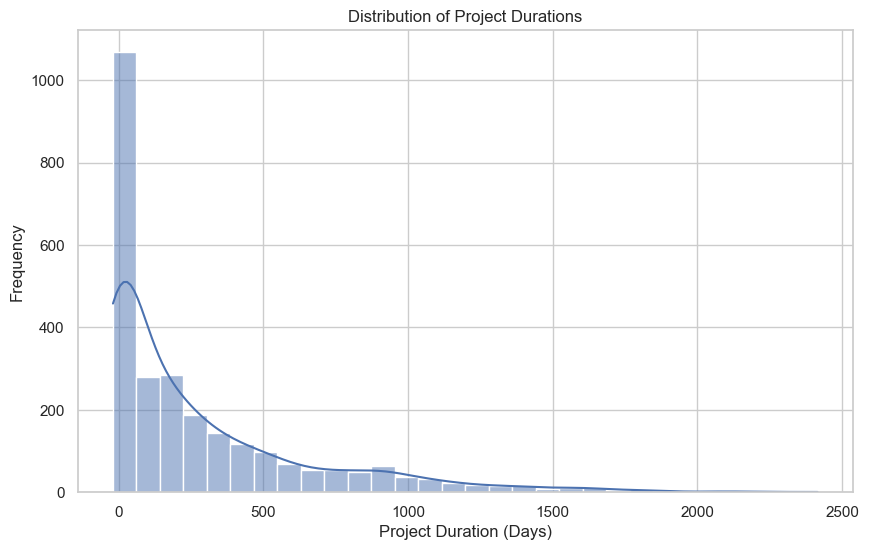

In [240]:
# The code below shows a histogram to display the distribution of the project durations 
# We will also be dropping the NaN values from the data
plt.figure(figsize=(10, 6))
sns.histplot(data['Project Duration Days'].dropna(), bins=30, kde=True) 
plt.title('Distribution of Project Durations')
plt.xlabel('Project Duration (Days)')
plt.ylabel('Frequency')
plt.show()

This visualization is interesting as it highlights that many projects have a recorded Project Duration of 0. This suggests that either project durations are not being properly recorded or that most projects are being completed in an extremely short timeframe.

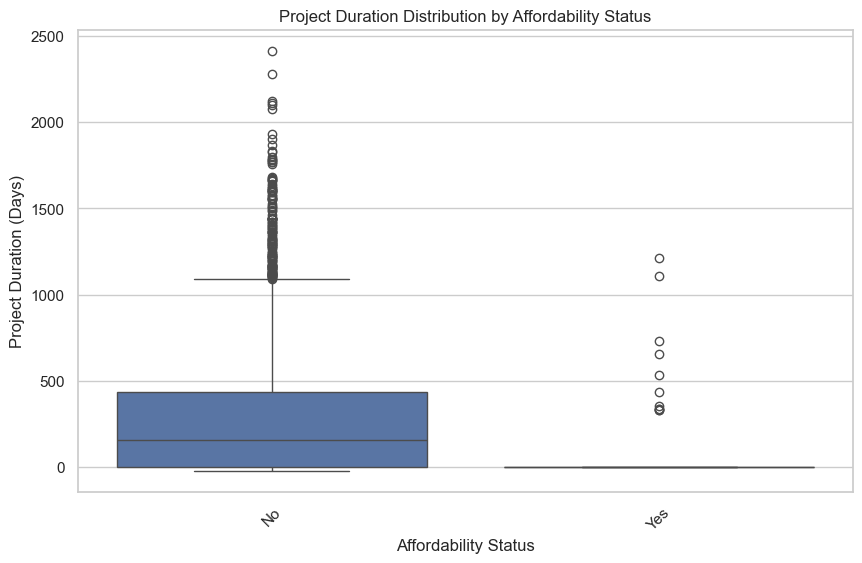

In [246]:
# This second visualization is a box plot that looks at the project duration and the affordability status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Extended Affordability Status', y='Project Duration Days', data=data)
plt.title('Project Duration Distribution by Affordability Status')
plt.xlabel('Affordability Status')
plt.ylabel('Project Duration (Days)')
plt.xticks(rotation=45)
plt.show()

This graph also shows that the minimum project duration is 0, while the median falls somewhere between 0 and just under 250. The maximum duration reaches 1,000 for non-affordable units, with many outliers exceeding this threshold. In contrast, for affordable units, the project duration is 0, and overall, their durations are shorter than those of non-affordable units.

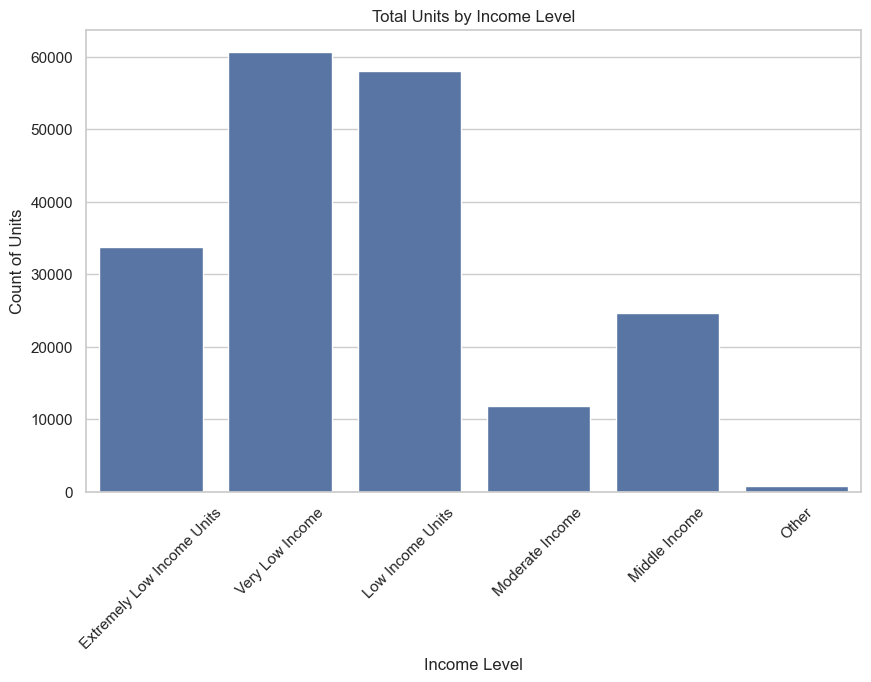

In [250]:
# This third visualization looks at the total amount of units by the income level
income_columns = ['Extremely Low Income Units', 'Very Low Income', 'Low Income Units', 
                  'Moderate Income', 'Middle Income', 'Other']
income_data = data[income_columns].sum().reset_index()
income_data.columns = ['Income Level', 'Count']
plt.figure(figsize=(10, 6))
sns.barplot(x='Income Level', y='Count', data=income_data)
plt.title('Total Units by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Count of Units')
plt.xticks(rotation=45)
plt.show()

This graph shows that extremely low-income, very low-income, and low-income units are prioritized, as they account for the highest number of units. Very low-income and low-income units are nearly tied for first place. In contrast, moderate-income and other rank last in the number of units accounted for.

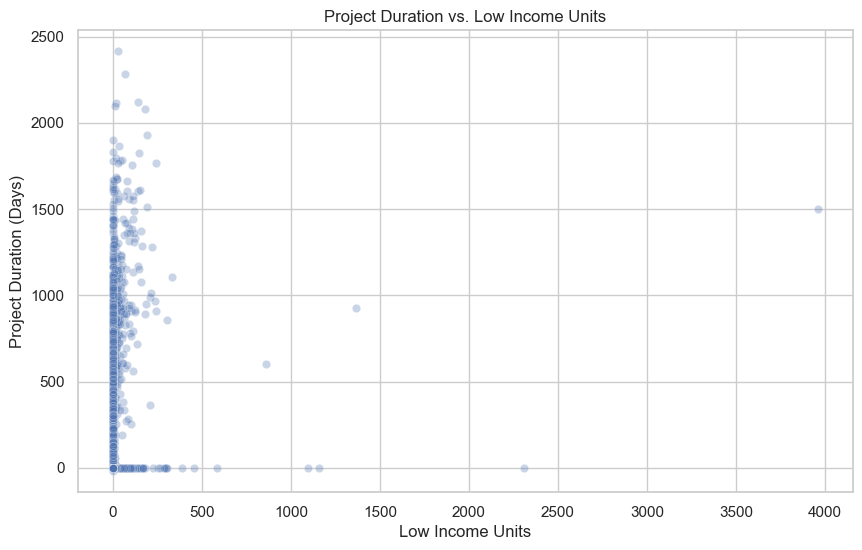

In [252]:
# This fourth visualization looks through a scatter plot at the project duration vs. the amount of low income units
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Low Income Units', y='Project Duration Days', alpha=0.3)
plt.title('Project Duration vs. Low Income Units')
plt.xlabel('Low Income Units')
plt.ylabel('Project Duration (Days)')
plt.show()

Here, we further examine project duration in days alongside the number of low-income units. This graph is confusing as it contradicts the trends observed in earlier graphs. It shows the number of low-income units being close to 0, while project duration ranges between 0 and 1,500 days. This discrepancy does not align with previous findings, where low-income units were prioritized, yet that pattern is not reflected here.

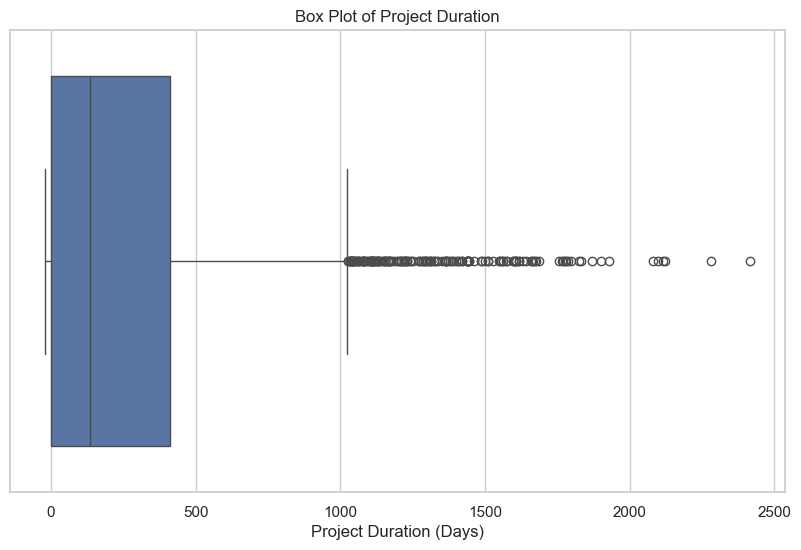

In [255]:
# This fifth visualization looks through a box plot at the project duration
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Project Duration Days'].dropna())  # Drop NaN values
plt.title('Box Plot of Project Duration')
plt.xlabel('Project Duration (Days)')
plt.show()


Again, when examining project duration in days, the graph shows that the minimum is 0, median is less than 250, while the maximum reaches 1,000. Additionally, many outliers sit beyond the 1,000-day mark.

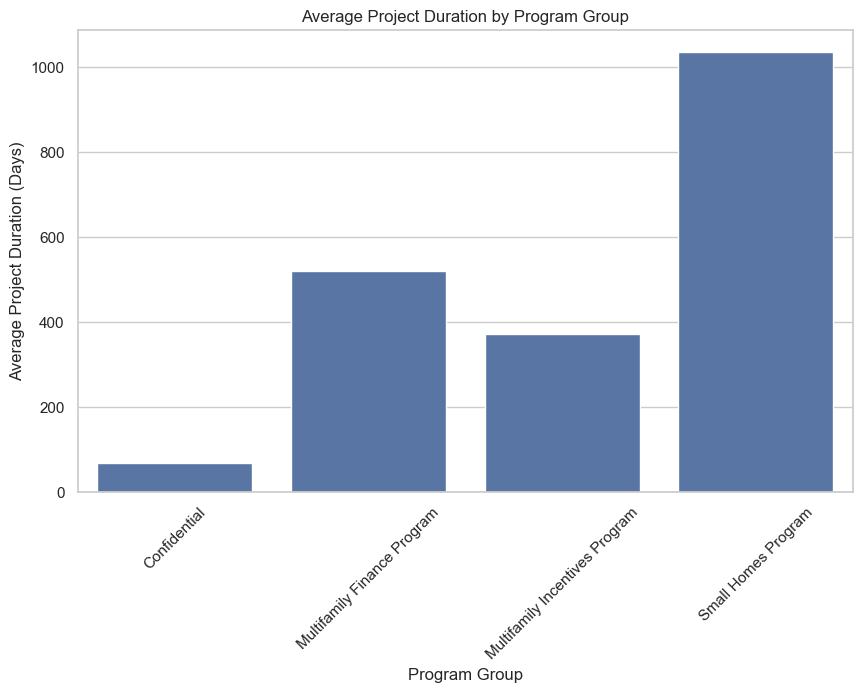

In [256]:
# This sixth visualization looks at the average project duration by the program group
program_group_duration = data.groupby('Program Group')['Project Duration Days'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Program Group', y='Project Duration Days', data=program_group_duration)
plt.title('Average Project Duration by Program Group')
plt.xlabel('Program Group')
plt.ylabel('Average Project Duration (Days)')
plt.xticks(rotation=45)
plt.show()

We analyzed project duration across different program groups to determine whether very low-income and low-income units were concentrated in specific groups. Surprisingly, the Small Homes Program has the longest duration, despite the expectation that smaller homes would be quicker to build. However, the data does not support this assumption. Instead, priority appears to be given to completing the Confidential and Multi-Family Incentives programs more quickly.

<function matplotlib.pyplot.title(label: 'str', fontdict: 'dict[str, Any] | None' = None, loc: "Literal['left', 'center', 'right'] | None" = None, pad: 'float | None' = None, *, y: 'float | None' = None, **kwargs) -> 'Text'>

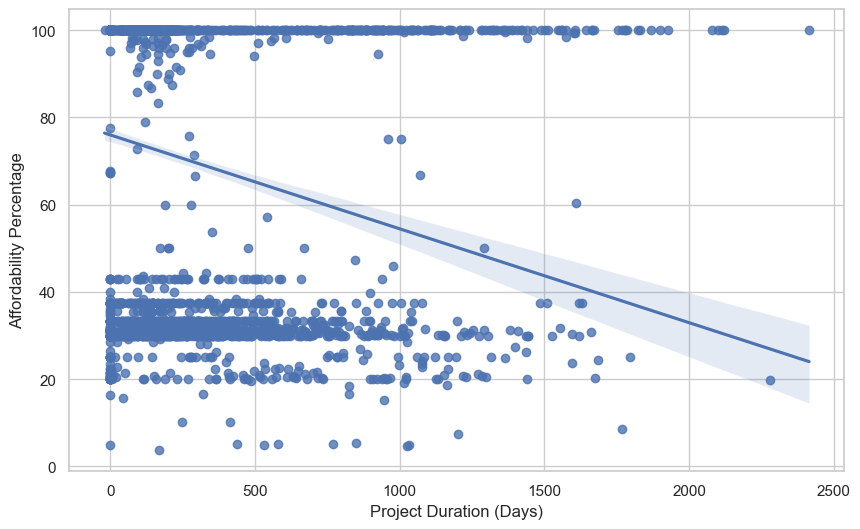

In [257]:
# This seventh visualiation displays the Project Duration (Days) vs. Affordability Percentage
plt.figure(figsize=(10, 6))
sns.regplot(x='Project Duration Days', y='Affordability Percentage', data=data)
plt.xlabel("Project Duration (Days)")
plt.ylabel("Affordability Percentage")
plt.title

The affordability percentage starts off very high but tends to concentrate around 30% and 100%, even as project duration increases. This suggests that while some projects maintain full affordability, others cluster around a lower threshold, regardless of how long they take to complete.

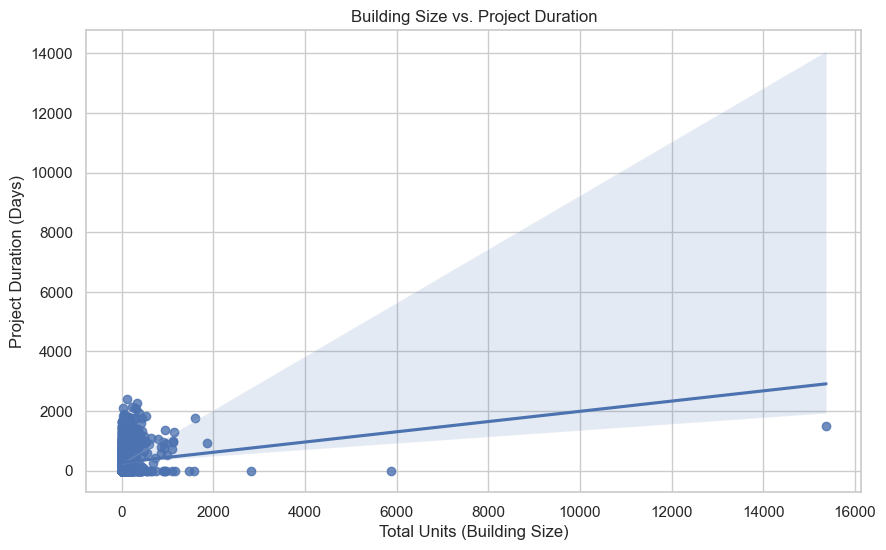

In [229]:
# This eighth visualization shows the Building Size vs Project Duration
plt.figure(figsize=(10, 6))
sns.regplot(x='Total Units', y='Project Duration Days', data=data)
plt.xlabel("Total Units (Building Size)")
plt.ylabel("Project Duration (Days)")
plt.title("Building Size vs. Project Duration")
plt.show()

Here, we see that project duration remains under 2,500 days, with most buildings averaging around 600 units, though several outliers exist. The data shows that small-unit homes still take a long time to be built despite their size, while larger buildings are being completed in less time.

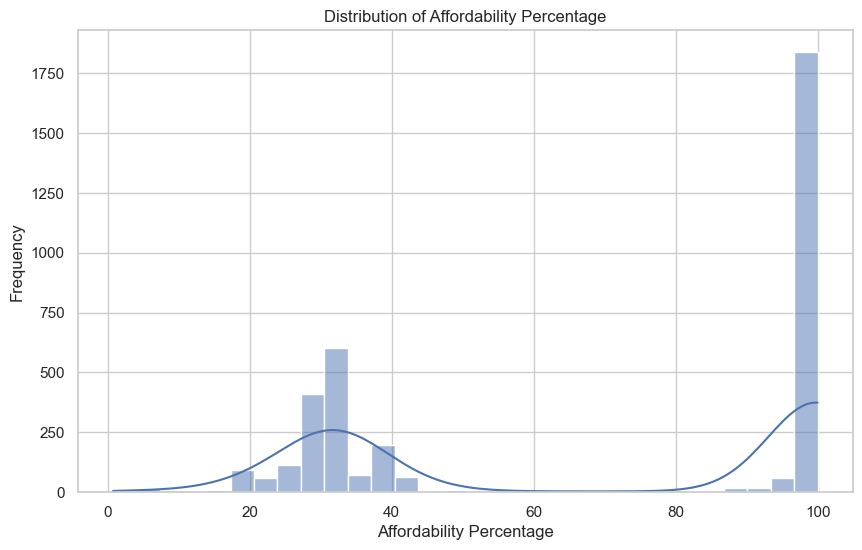

In [228]:
# This ninth visualization shows the Frequency for the Affordability Percentage
plt.figure(figsize=(10, 6))
sns.histplot(data['Affordability Percentage'], bins=30, kde=True)
plt.title("Distribution of Affordability Percentage")
plt.xlabel("Affordability Percentage")
plt.ylabel("Frequency")
plt.show()

This graph highlights that the frequency is significantly higher for units that are 100% affordable, with the next highest concentration in the 30% affordability range. This suggests that smaller units may take longer to complete due to their high volume, while projects with lower affordability percentages are completed more quickly, likely because they occur less frequently.